In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib import colors 


%config InlineBackend.figure_format = 'retina' 

# Netflix Data Set 
## Tasks
1) understand the dataset types and missing values
2) clean the dataset and handle missing values
3) perform data visuallzation
4) creat final summery report 

In [3]:
df_netfilx = pd.read_csv("/Users/henokrezene/Desktop/EDA/finalProject/netflix_titles.csv")
df_netfilx.head(5) 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_netfilx.shape # tells the # of rows and columns of the dataset 

(8807, 12)

In [5]:
df_netfilx.describe()  # tells the same basic stats about colums 

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df_netfilx['type'].unique() 

array(['Movie', 'TV Show'], dtype=object)

In [7]:
df_netfilx.info() # shows the count and datatypes of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Missing Values 

In [9]:
df_netfilx.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Handlling a missing values 
in the titanic data set we missed the following datas
1) rating
2) cast
3) country
4) director
i am gone fill them with unavilabel insted of nulls

In [11]:
df_netfilx.fillna({'rating ': 'unavilabele', 'cast': 'unavilabele', 'country': 'unavilabele', 'director': 'unavilabele'},inplace=True) 
df_netfilx.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [12]:
# # conver date type from object to datetime64
# df_netfilx['year'] = df_netfilx['date_added'].df_netfilx.year()
# df_netfilx.info() 

# Convert 'date_added' from object to datetime64
df_netfilx['date_added'] = pd.to_datetime(df_netfilx['date_added'], errors='coerce')

# Extract the year from 'date_added' and create a new column 'year'
df_netfilx['year'] = df_netfilx['date_added'].dt.year

# Display the DataFrame info to verify changes
df_netfilx.info()
                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year          8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


In [13]:
df_netfilx[df_netfilx.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unavilabele,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,NaT,2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa...",NaN
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,unavilabele,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN
6177,s6178,TV Show,忍者ハットリくん,unavilabele,unavilabele,Japan,NaT,2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto...",NaN
6213,s6214,TV Show,Bad Education,unavilabele,"Jack Whitehall, Mathew Horne, Sarah Solemani, ...",United Kingdom,NaT,2014,TV-MA,3 Seasons,"British TV Shows, TV Comedies","A history teacher at the posh Abbey Grove, Alf...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8539,s8540,TV Show,The Tudors,unavilabele,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,2010,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...,NaN
8557,s8558,TV Show,The West Wing,unavilabele,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,2005,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...,NaN
8684,s8685,TV Show,Vroomiz,unavilabele,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ...",NaN
8712,s8713,TV Show,Weird Wonders of the World,unavilabele,Chris Packham,United Kingdom,NaT,2016,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...,NaN


In [14]:
# most_recent= df_netfilx['date_added'].max()
# df_netfilx.fillna({'date_added':most_recent}, inplace=True)

# Additional data cleansing
Druration data input error

In [16]:
# check if there is a NaN value in the duration
df_netfilx[df_netfilx.duration.isnull()] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0


In [17]:
# check how many missing values are under Louis C.K
df_netfilx[df_netfilx.director == "Louis C.K."].head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0


In [18]:
# use loc operator to overwrite the missing values 

df_netfilx.loc[df_netfilx['director'] == 'Louis C.K.' , 'duration'] = df_netfilx['rating'] 


df_netfilx[df_netfilx.director == 'Louis C.K'].head()
# df_netfilx.head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year


In [19]:
df_netfilx.loc[df_netfilx['director'] == 'Louis C.K', 'rating'] = 'Unavailable'
df_netfilx[df_netfilx.director == 'Louis C.K'].head()
df_netfilx

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavilabele,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,unavilabele,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavilabele,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,unavilabele,unavilabele,unavilabele,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,unavilabele,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8803,s8804,TV Show,Zombie Dumb,unavilabele,unavilabele,unavilabele,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0


# Visualizations

In [21]:
df_netfilx.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [22]:
df_netfilx['type'] = df_netfilx['type'].astype('category')
df_netfilx['type'] = df_netfilx['type'].cat.as_ordered()
df_netfilx['type']  

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: category
Categories (2, object): ['Movie' < 'TV Show']

In [23]:
tab = pd.crosstab(index=df_netfilx['type'], columns='count')
tab

col_0,count
type,
Movie,6131
TV Show,2676


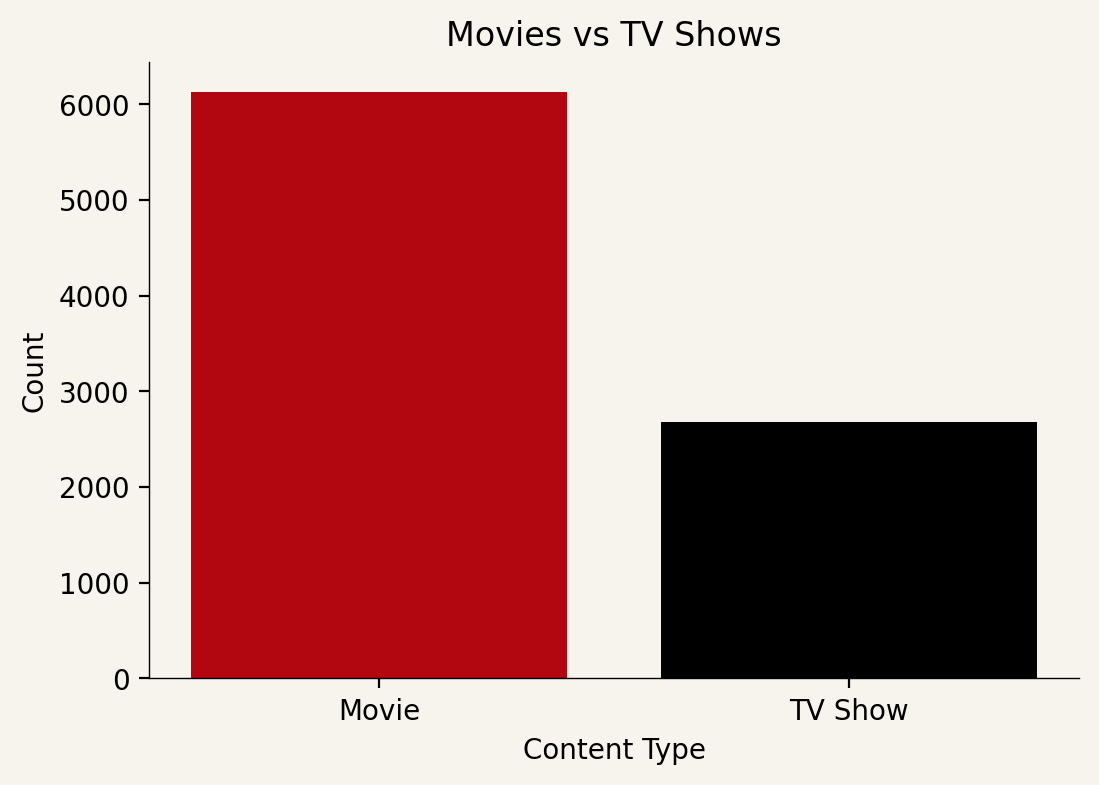

In [109]:
# bar plt for netflix dataset
type_counts = df_netfilx['type'].value_counts()

# Define colors for the bars
colors = ['#B20710', 'black']  # red for Movies, black for TV Shows

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(type_counts.index, type_counts, color=colors) 

ax.set_title('Movies vs TV Shows')
ax.set_xlabel('Content Type')
ax.set_ylabel('Count')


# set ticker
# ax.set_xticks(x_new)
# ax.set_xticklabels([f'Cylinder-{n} for n in x], rotation= 90) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5) 
ax.spines['bottom'].set_linewidth(.5)

# ax.legend( ['Movies'] , loc='upper right')

ax.set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor('#f7f4ed') 
plt.show() 

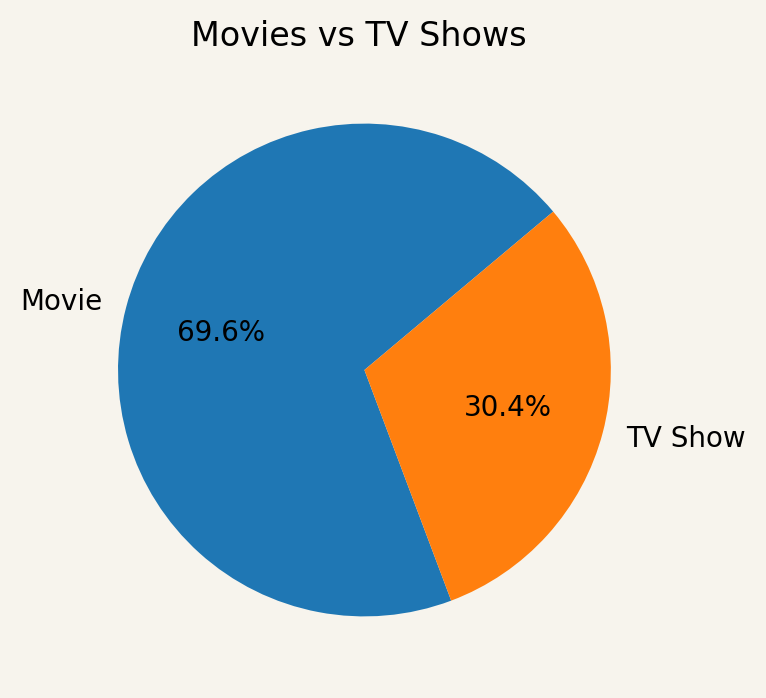

In [25]:
# visualization with pie chart

type_counts = df_netfilx['type'].value_counts()

fig, ax = plt.subplots(figsize=(6,4))

ax.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=40)

ax.set_title('Movies vs TV Shows ')

ax.set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor('#f7f4ed')

plt.show() 


# Countries Analysis Netfliex¶
The Top Ten Countries That Produced For Netflix

In [27]:
df_netfilx['country'].value_counts().head(10)  

country
United States     2818
India              972
unavilabele        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

# Netflix Movie vs Tv Show Countriewise 

In [29]:
df_netfilx['country'].value_counts().head(10) 

country
United States     2818
India              972
unavilabele        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [30]:
df_netfilx.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

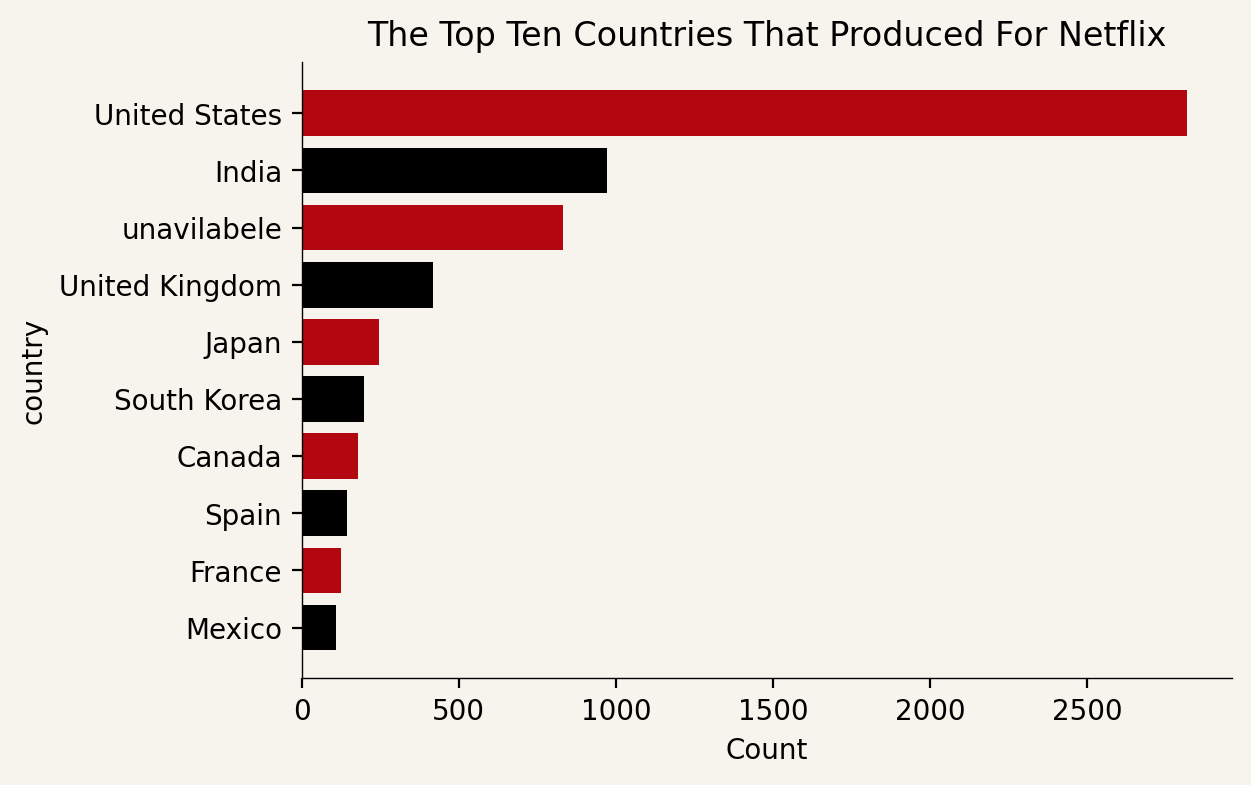

In [31]:


top_ten = df_netfilx['country'].value_counts().head(10) 

colors = ['#B20710', '#000000'] * (len(top_ten) // 2) + ['#B20710'] * (len(top_ten) % 2) 


fig, ax = plt.subplots(figsize=(6, 4)) 
bar_width = 0.78

sns.countplot(y='country', order = df_netfilx['country'].value_counts().index[0:10], data = df_netfilx)
plt.title('The Top Ten Countries That Produced For Netflix')


# horizontal bar plot (barh)    with red and black colors
bars = ax.barh(top_ten.index, top_ten.values, color=colors)


ax.set_xlabel('Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5) 

ax.set_facecolor(color='#f7f4ed') 
fig.patch.set_facecolor('#f7f4ed')

plt.show() 

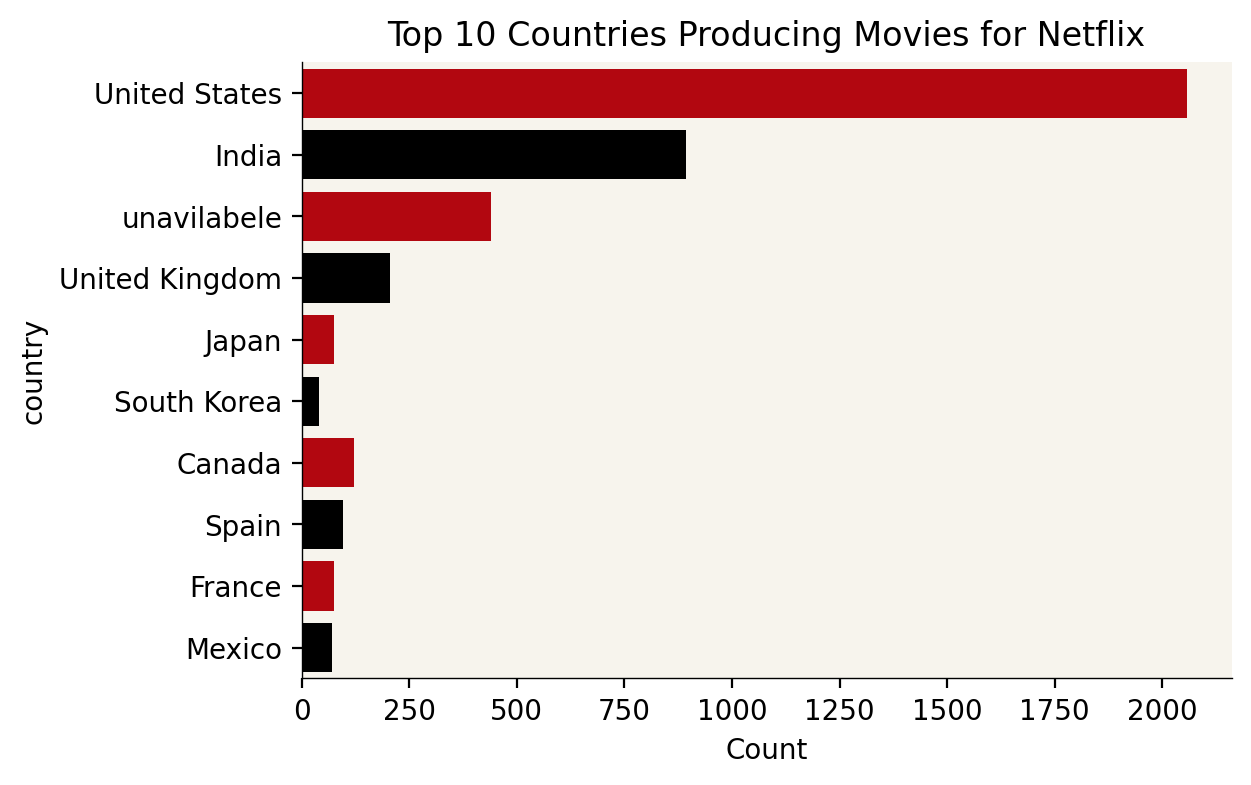

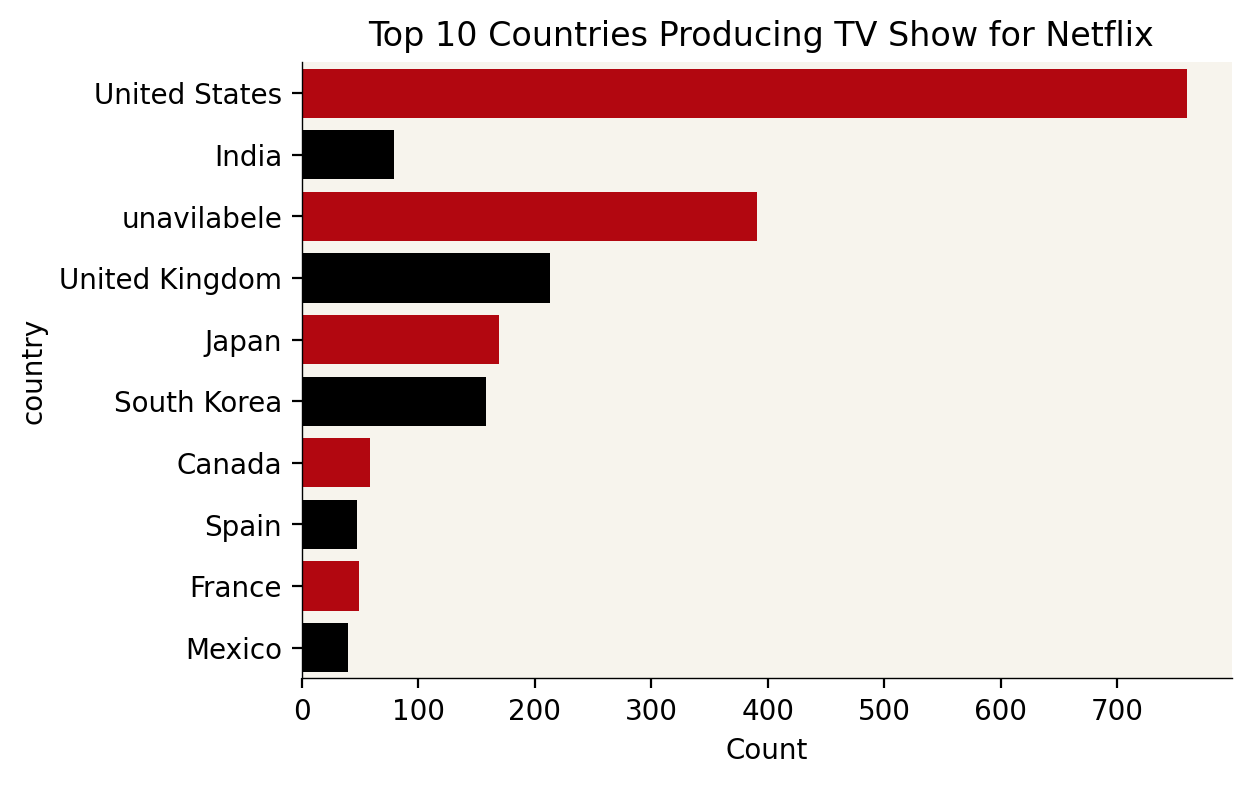

In [32]:


# Assuming df_netfilx is already defined

movie_country = df_netfilx[df_netfilx['type'] == 'Movie']
tv_show = df_netfilx[df_netfilx['type'] == 'TV Show']

# Define colors
movie_colors = ['#B20710', '#000000']
tv_show_colors = ['#B20710', '#000000']

# Movie plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(y='country', order=df_netfilx['country'].value_counts().index[0:10], data=movie_country)
plt.title('Top 10 Countries Producing Movies for Netflix')

# Set the colors for the movie plot
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(movie_colors[i % len(movie_colors)])


ax.set_xlabel('Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5) 

ax.set_facecolor(color='#f7f4ed') 
fig.patch.set_facecolor('#f7f4ed')

plt.show()

# TV show plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(y='country', order=df_netfilx['country'].value_counts().index[0:10], data=tv_show)
plt.title('Top 10 Countries Producing TV Show for Netflix ')

# Set the colors for the TV show plot
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(tv_show_colors[i % len(tv_show_colors)])


ax.set_xlabel('Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5) 

ax.set_facecolor(color='#f7f4ed') 
fig.patch.set_facecolor('#f7f4ed')

plt.show()



# Hulu dataset 

In [34]:
# hulu data
df_hulu = pd.read_csv("/Users/henokrezene/Desktop/EDA/finalProject/hulu_titles.csv")
df_hulu.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [35]:
df_hulu.shape

(3073, 12)

In [36]:
df_hulu.describe() 

,cast,release_year
count,0.0,3073.000000
mean,NaN,2012.567524
std,NaN,10.844069
min,NaN,1923.000000
25%,NaN,2010.000000
50%,NaN,2016.000000
75%,NaN,2019.000000
max,NaN,2021.000000


In [37]:
df_hulu.info() # count and datatypes of colunms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


In [38]:
df_hulu['type'].unique() 

array(['Movie', 'TV Show'], dtype=object)

In [39]:
df_hulu.isna().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

In [40]:
df_hulu['type'].value_counts() # count for each unique value

type
TV Show    1589
Movie      1484
Name: count, dtype: int64

# Data Types and Fill the Missing Values 

The following do not requre any fills
1) type
2) title
3) release_year
4) listed_in
5) description

The following are missing data:
1) duration
2) rating
3) date_added
4) cast
5) director
6) country

In [42]:
# convert the data type from object to datetime64 


# df_hulu = "20 February, 1991"
# df_hulu = datetime.datetime.strptime(date_v3_dt , "%d %B, %Y")
# df_hulu


df_hulu['date_added'] = pd.to_datetime(df_hulu['date_added'])



In [43]:
df_hulu.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,2021-10-24,2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,2021-10-23,2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,2021-10-23,2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,2021-10-22,2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,2021-10-22,2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


# Missing Values of Hulu

In [45]:
df_hulu.fillna({'rating': 'Unavailable', 'cast': 'Unavailable','country': 'Unavailable', 'director': 'Unavailable', 'description': 'Unavailable'}, inplace=True)
df_hulu.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added       28
release_year      0
rating            0
duration        479
listed_in         0
description       0
dtype: int64

In [46]:
df_hulu[df_hulu.date_added.isnull()]
df_hulu.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,Unavailable,Unavailable,Unavailable,2021-10-24,2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,Unavailable,Unavailable,Unavailable,2021-10-23,2020,Unavailable,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,Unavailable,Unavailable,Unavailable,2021-10-23,2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,Unavailable,Unavailable,Unavailable,2021-10-22,2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,Unavailable,Unavailable,Unavailable,2021-10-22,2021,Unavailable,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [47]:
# date_added  NaT to be update with the most recenet date 
most_recent_entry = df_hulu['date_added'].max()
df_hulu.fillna({'date_added': most_recent_entry}, inplace=True)  

In [48]:
df_hulu.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,Unavailable,Unavailable,Unavailable,2021-10-24,2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,Unavailable,Unavailable,Unavailable,2021-10-23,2020,Unavailable,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,Unavailable,Unavailable,Unavailable,2021-10-23,2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,Unavailable,Unavailable,Unavailable,2021-10-22,2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,Unavailable,Unavailable,Unavailable,2021-10-22,2021,Unavailable,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


# Additional Data Cleansing for Hulu Dataset
Duration Date input errore



In [50]:
df_hulu[df_hulu.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,Unavailable,Unavailable,Unavailable,2021-10-24,2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
12,s13,Movie,Out of the Shadows: The Man Behind the Steele ...,Unavailable,Unavailable,Unavailable,2021-10-18,2021,Unavailable,NaN,News,George Stephanopoulos sits down with former MI...
15,s16,Movie,Showtime Championship Boxing: Lopez vs. Salido...,Unavailable,Unavailable,Unavailable,2021-10-16,2011,Unavailable,NaN,Sports,Juan Manuel Lopez vs. Orlando Salido for the W...
37,s38,Movie,BELLATOR MMA: Kongo vs. Johnson 2,Unavailable,Unavailable,Unavailable,2021-10-13,2020,Unavailable,NaN,Sports,Cheick Kongo vs. Tim Johnson battle in a histo...
40,s41,Movie,In the Crease,Unavailable,Unavailable,Unavailable,2021-10-13,2020,Unavailable,NaN,Sports,Post-game analysis and highlight show airing e...
...,...,...,...,...,...,...,...,...,...,...,...,...
2951,s2952,Movie,All Saints (1998),Unavailable,Unavailable,Australia,2014-02-19,1998,12 Seasons,NaN,"Drama, International",All Saints is an Australian medical drama focu...
2955,s2956,Movie,Getting On,Unavailable,Unavailable,United Kingdom,2014-01-07,2009,3 Seasons,NaN,"Comedy, International, Sitcom",Care for the elderly is the least glamorous ar...
2958,s2959,Movie,(Sub) Ninja Scroll,Unavailable,Unavailable,Japan,2013-12-15,1993,93 min,NaN,"Action, Adult Animation, Adventure",When Jubei saves a young ninja woman from the ...
2959,s2960,Movie,Packed to the Rafters,Unavailable,Unavailable,Australia,2013-12-03,2008,6 Seasons,NaN,"Comedy, Drama, International",Packed to the Rafters is an Australian family-...


# Visualizations

In [52]:
df_hulu.type.value_counts() # vallue shows the counts of different catagories in a given colunmns 

type
TV Show    1589
Movie      1484
Name: count, dtype: int64

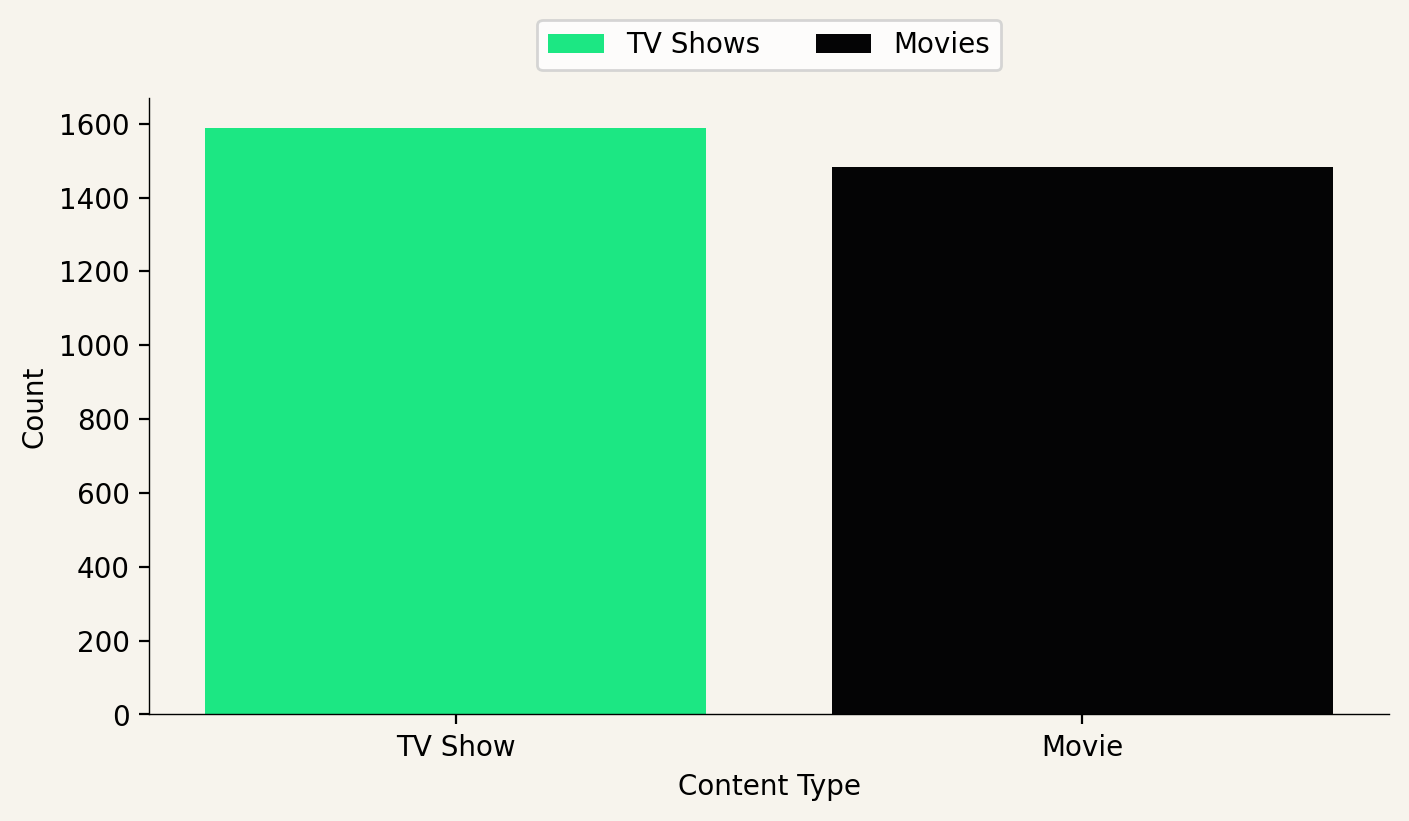

In [111]:

type_counts = df_hulu['type'].value_counts()

# Define colors for the bars
colors = [ '#1CE783', '#040405']  # dark green for Movies, Orange for TV Shows

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(type_counts.index, type_counts, color=colors, label=['Movies', 'TV Shows'])

# ax.set_title('Movies vs TV Shows')
ax.set_xlabel('Content Type')
ax.set_ylabel('Count')


# set ticker
# ax.set_xticks(x_new)
# ax.set_xticklabels([f'Cylinder-{n} for n in x], rotation= 90) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5) 
ax.spines['bottom'].set_linewidth(.5)

# legend
ax.legend(bars, [ 'TV Shows', 'Movies' ], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# background
ax.set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor('#f7f4ed')


plt.show() 

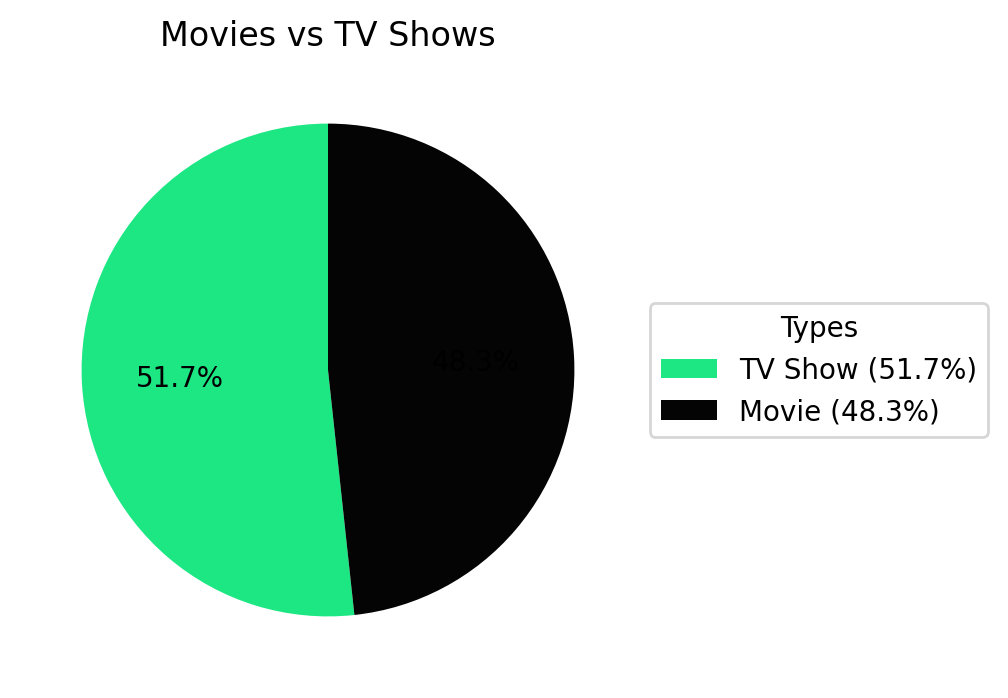

In [54]:
# visualization with pie chart

# type_counts = df_hulu['type'].value_counts()

# # colors = ['#1CE783', '#040405'] 

# fig, ax = plt.subplots(figsize=(6,4))

# ax.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)

# # ax.pie(type_counts, labels=type_counts.index, colors=colors , startangle=90)

# ax.set_title('Movies vs TV Shows ')

# plt.show() 

# Assuming df_hulu is already defined and type_counts is calculated
type_counts = df_hulu['type'].value_counts()

# Define colors
colors = ['#1CE783', '#040405']

# Calculate the percentage for each type
total = type_counts.sum()
labels = [f'{label} ({count/total:.1%})' for label, count in zip(type_counts.index, type_counts)]

fig, ax = plt.subplots(figsize=(6, 4))

# Create the pie chart with the specified colors and without labels
wedges, texts, autotexts = ax.pie(type_counts, startangle=90, colors=colors, autopct='%1.1f%%')

# Add the legend with the labels and colors
ax.legend(wedges, labels, title="Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title
ax.set_title('Movies vs TV Shows')

# Display the plot
plt.show()



# Countries Analysis Hulu

The Top Ten Countries That Produced For Hulu

In [56]:
df_hulu['country'].value_counts().head(10) 

country
Unavailable                      1453
United States                     921
Japan                             268
United Kingdom                    113
Canada                             34
United Kingdom, United States      26
Australia                          20
Canada, United States              18
United States, Canada              16
South Korea                        12
Name: count, dtype: int64

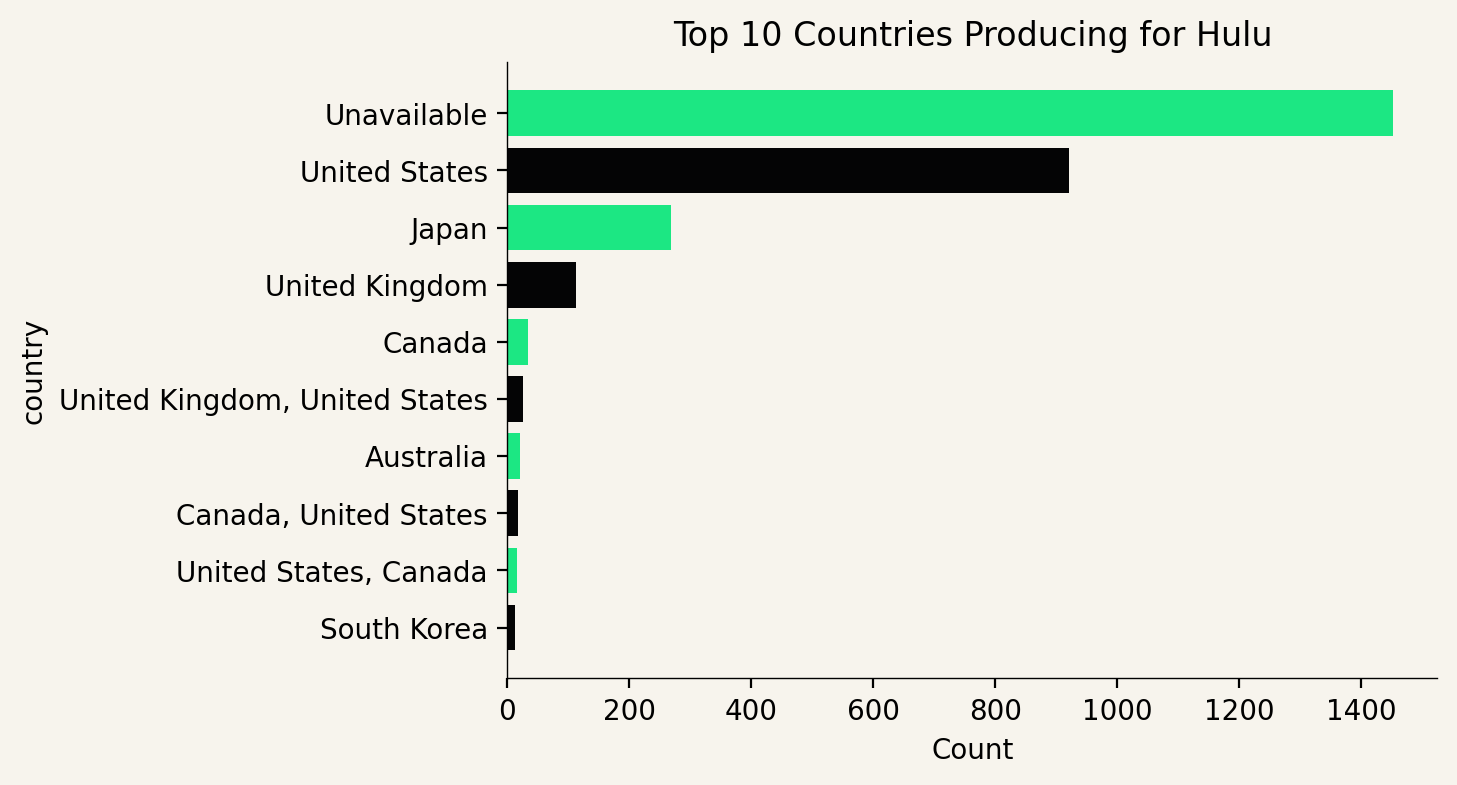

In [57]:
top_ten = df_hulu['country'].value_counts().head(10) 

colors = ['#1CE783', '#040405'] * (len(top_ten) // 2) + ['#1CE783'] * (len(top_ten) % 2) 


fig, ax = plt.subplots(figsize=(6, 4)) 
bar_width = 0.78

sns.countplot(y='country', order = df_hulu['country'].value_counts().index[0:10], data = df_hulu)
plt.title('Top 10 Countries Producing for Hulu')


# horizontal bar plot (barh)    with red and black colors
bars = ax.barh(top_ten.index, top_ten.values, color=colors)


ax.set_xlabel('Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5) 

ax.set_facecolor(color='#f7f4ed') 
fig.patch.set_facecolor('#f7f4ed')

plt.show() 

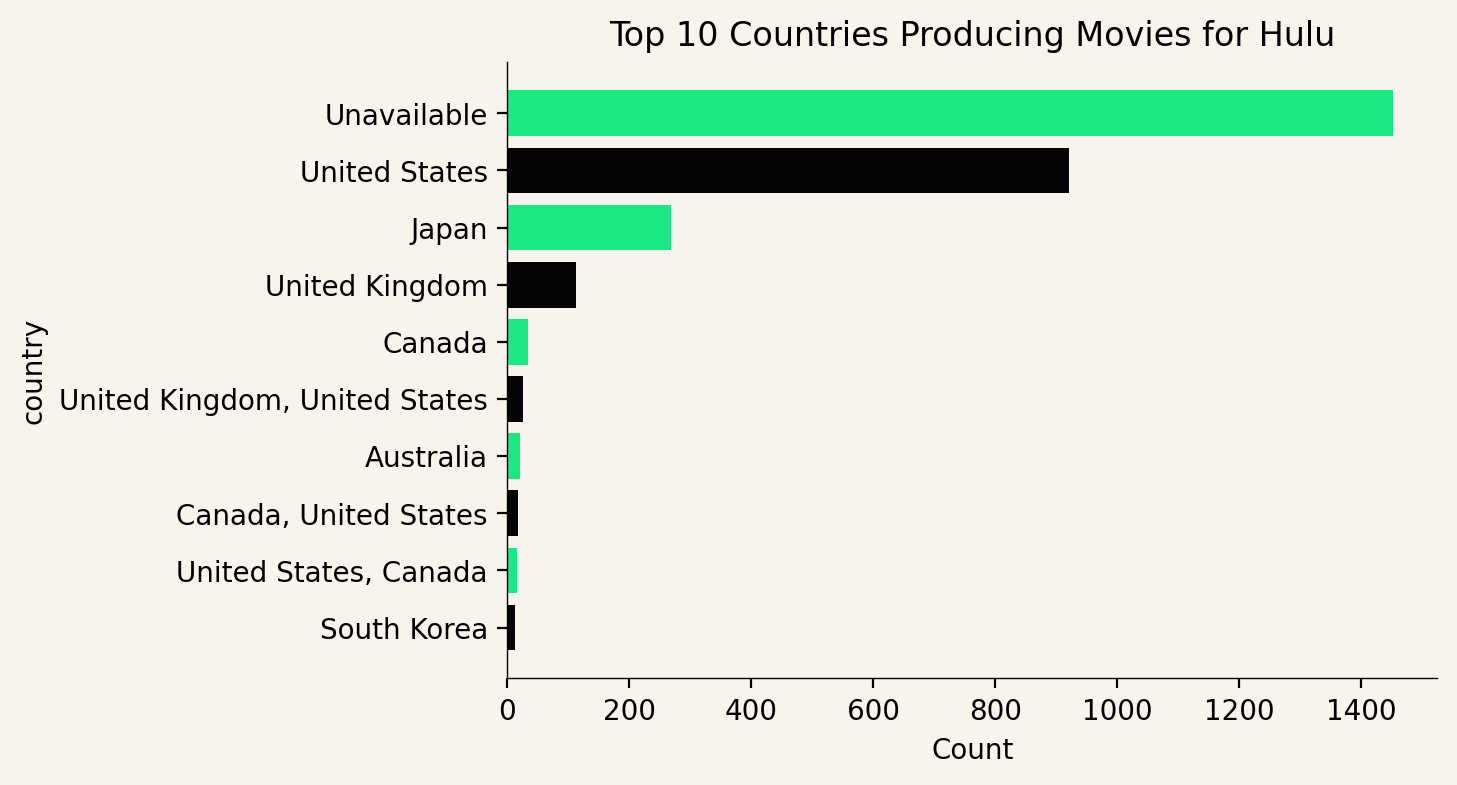

In [58]:
# type of contenet besed on countries
# top_ten = df_hulu['country'].value_counts().head(10) 

movie_country = df_hulu[df_hulu['type']=='Movie'] 

colors = ['#1CE783', '#040405'] * (len(top_ten) // 2) + ['#1CE783'] * (len(top_ten) % 2) 


fig, ax = plt.subplots(figsize=(6, 4)) 
bar_width = 0.78


sns.countplot(y='country', order=df_hulu['country'].value_counts().index[0:10], data = movie_country)
plt.title('Top 10 Countries Producing Movies for Hulu')


# horizontal bar plot (barh)    
bars = ax.barh(top_ten.index, top_ten.values, color=colors)


ax.set_xlabel('Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5) 

ax.set_facecolor(color='#f7f4ed') 
fig.patch.set_facecolor('#f7f4ed')

plt.show() 

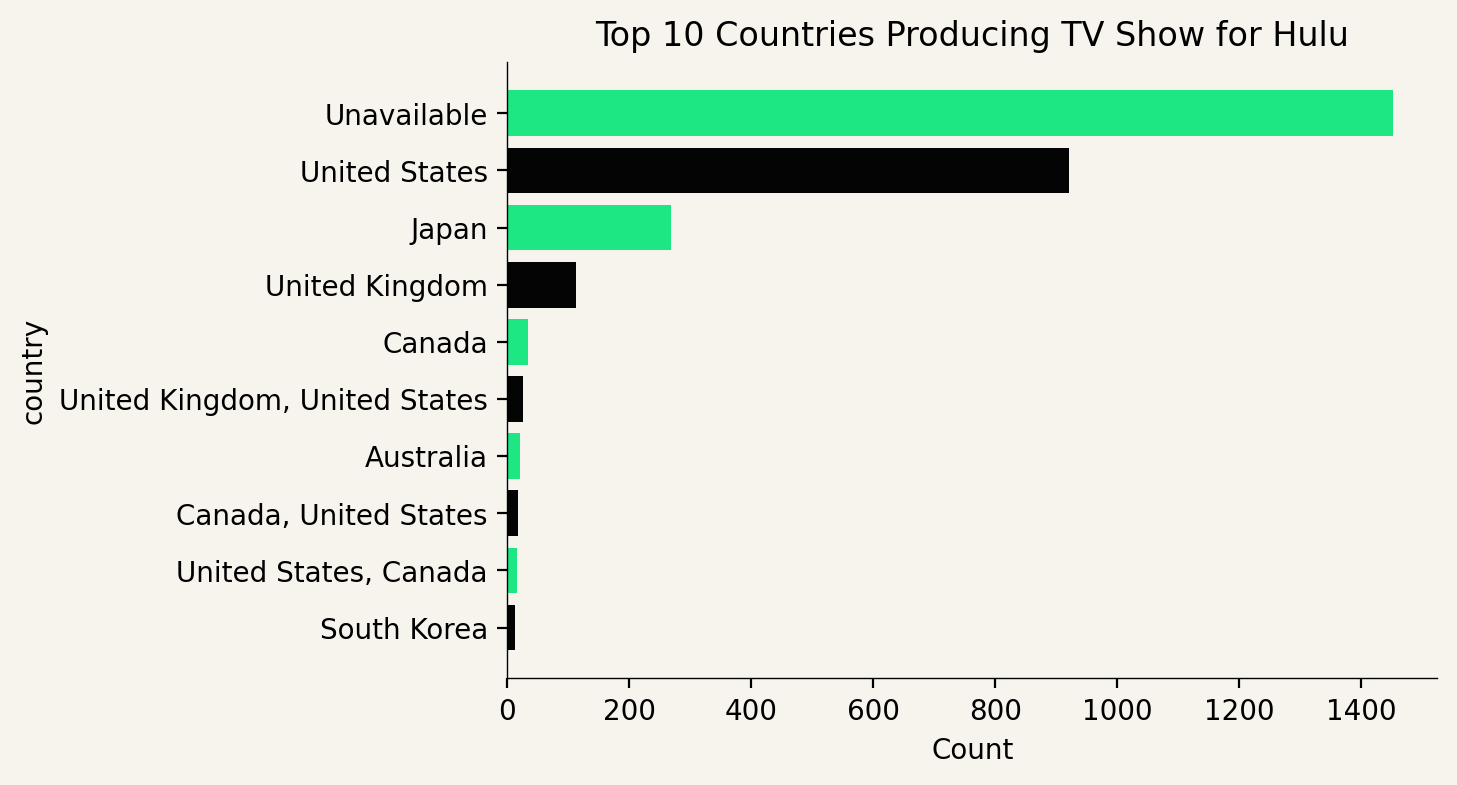

In [59]:
# hulu top 10 Tv show producer countries 

tv_show = df_hulu[ df_hulu['type'] == 'TV Show']

colors = ['#1CE783', '#040405'] * (len(top_ten) // 2) + ['#1CE783'] * (len(top_ten) % 2) 


fig, ax = plt.subplots(figsize=(6, 4)) 
bar_width = 0.78


sns.countplot(y='country', order=df_hulu['country'].value_counts().index[0:10], data = tv_show)
plt.title('Top 10 Countries Producing TV Show for Hulu')


# horizontal bar plot (barh)    
bars = ax.barh(top_ten.index, top_ten.values, color=colors)


ax.set_xlabel('Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5) 

ax.set_facecolor(color='#f7f4ed') 
fig.patch.set_facecolor('#f7f4ed')

plt.show() 